In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
df_c = pd.read_excel('option-chain-ED-NIFTY-31-Aug-2023-_1_.xlsx', 'Calls')
df_p = pd.read_excel('option-chain-ED-NIFTY-31-Aug-2023-_1_.xlsx', 'Puts')
print(df_c.head())

     OI  CHNG IN OI  VOLUME    IV     LTP   CHNG  BID QTY     BID     ASK  \
0   233         -48     198  7.66  406.10 -80.60       50  399.15  408.95   
1  4104          32    3250  7.81  365.50 -82.25       50  365.50  368.35   
2   371          65     624  8.25  330.05 -78.50       50  323.35  330.20   
3  7293         549    7770  8.28  294.45 -74.60       50  286.80  294.20   
4   948         163    1339  8.30  259.55 -71.70       50  252.10  259.80   

   ASK QTY  STRIKE  
0       50   19150  
1       50   19200  
2       50   19250  
3      250   19300  
4       50   19350  


In [3]:
strike_price=df_c['STRIKE'].to_numpy()

In [4]:
print(strike_price)

[19150 19200 19250 19300 19350 19400 19450 19500 19550 19600 19650 19700]


In [5]:
spot_price=19428.30
time=20/252
rate=0.06
N=norm.cdf

In [6]:
def bs_c(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def bs_p(S, K, T, r, sigma):
    return K * np.exp(-r*T) + bs_c(S, K, T, r, sigma) - S

In [7]:
print(bs_c(19428.30, 19400, 20/252, 0.065, 0.0825))

250.8303971777823


In [8]:
pred_c=[]
pred_p=[]
act_c=[]
act_p=[]
for i in range(len(df_c)):
    S=spot_price
    K=df_c.iloc[i]['STRIKE']
    T=time
    r=rate
    sigma=df_c.iloc[i]['IV']/100
    pred_c.append(bs_c(S, K, T, r, sigma))
    pred_p.append(bs_p(S, K, T, r, sigma))
    act_c.append((df_c.iloc[i]['BID QTY']*df_c.iloc[i]['BID']+df_c.iloc[i]['ASK QTY']*df_c.iloc[i]['ASK'])/(df_c.iloc[i]['BID QTY']+df_c.iloc[i]['ASK QTY']))
    act_p.append((df_p.iloc[i]['BID QTY']*df_p.iloc[i]['BID']+df_p.iloc[i]['ASK QTY']*df_p.iloc[i]['ASK'])/(df_p.iloc[i]['BID QTY']+df_p.iloc[i]['ASK QTY']))
    
    


In [21]:
# print(np.mean(pred_c))
# print(np.mean(act_c))
# print(np.mean(pred_p))
# print(np.mean(act_p))

acc = 100 - 100*(np.mean(pred_c) - np.mean(act_c) + np.mean(pred_p) - np.mean(act_p))/(np.mean(act_c) + np.mean(act_p)) 
print(acc)

94.7100933537698


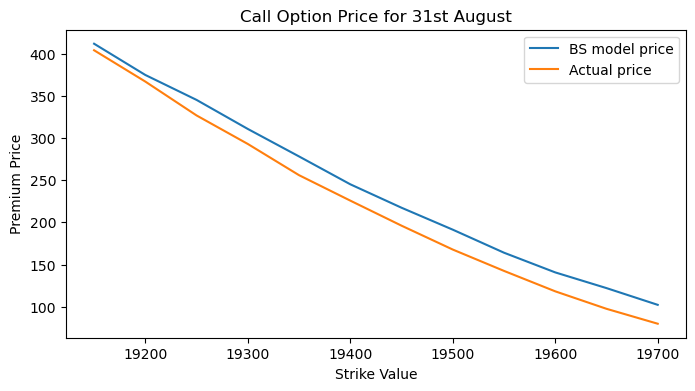

In [16]:
import matplotlib.pyplot as plt

# Sample data
x_values = strike_price
y1_values = pred_c
y2_values = act_c

plt.figure(figsize=(8, 4))

# Create a line plot
plt.plot(x_values, y1_values, label='BS model price')
plt.plot(x_values, y2_values, label='Actual price')

# Adding labels and title
plt.xlabel('Strike Value')
plt.ylabel('Premium Price')
plt.title('Call Option Price for 31st August')
plt.legend()

# Show the plot
plt.show()


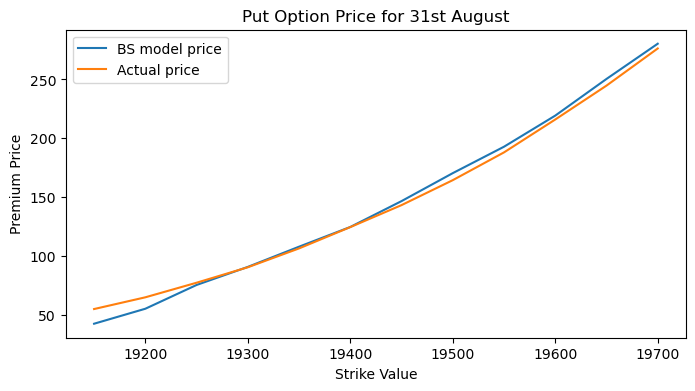

In [17]:
import matplotlib.pyplot as plt

# Sample data
x_values = strike_price
y1_values = pred_p
y2_values = act_p

plt.figure(figsize=(8, 4))

# Create a line plot
plt.plot(x_values, y1_values, label='BS model price')
plt.plot(x_values, y2_values, label='Actual price')

# Adding labels and title
plt.xlabel('Strike Value')
plt.ylabel('Premium Price')
plt.title('Put Option Price for 31st August')
plt.legend()

# Show the plot
plt.show()
